In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from pandas.api.types import CategoricalDtype
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

#### Dataset 1:
https://www.kaggle.com/datasets/kmldas/hr-employee-data-descriptive-analytics

In [2]:
df = pd.read_excel("HR_Employee_Data.xlsx")
df.head()

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low
1,IND28133,0.80,0.86,5,262,6,0,1,0,sales,medium
2,IND07164,0.11,0.88,7,272,4,0,1,0,sales,medium
3,IND30478,0.72,0.87,5,223,5,0,1,0,sales,low
4,IND24003,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 11)

In [7]:
df.dtypes

Emp_Id                    object
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [40]:
df['salary'] = df['salary'].astype('category')
df['Department'] = df['Department'].astype('category')

In [41]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [42]:
df.isna().sum()

Emp_Id                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

No NULL values

In [43]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [44]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [45]:
pd.crosstab(index=df['salary'], columns='percentage', normalize='columns')

col_0,percentage
salary,
high,0.082472
low,0.487766
medium,0.429762


In [46]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

We notice a skew for non attrited population

In [47]:
df['satisfaction_level'].quantile([.0, 0.01, 0.25, .5, 0.75, 0.99, 1])

0.00    0.09
0.01    0.09
0.25    0.44
0.50    0.64
0.75    0.82
0.99    0.99
1.00    1.00
Name: satisfaction_level, dtype: float64

In [49]:
# Binning satisfaction levels
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']
df['satisfaction_level_bins'] = pd.qcut(df['satisfaction_level'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels)

df[['satisfaction_level_bins','satisfaction_level']].head(2)

,satisfaction_level_bins,satisfaction_level
0,very low,0.38
1,high,0.80


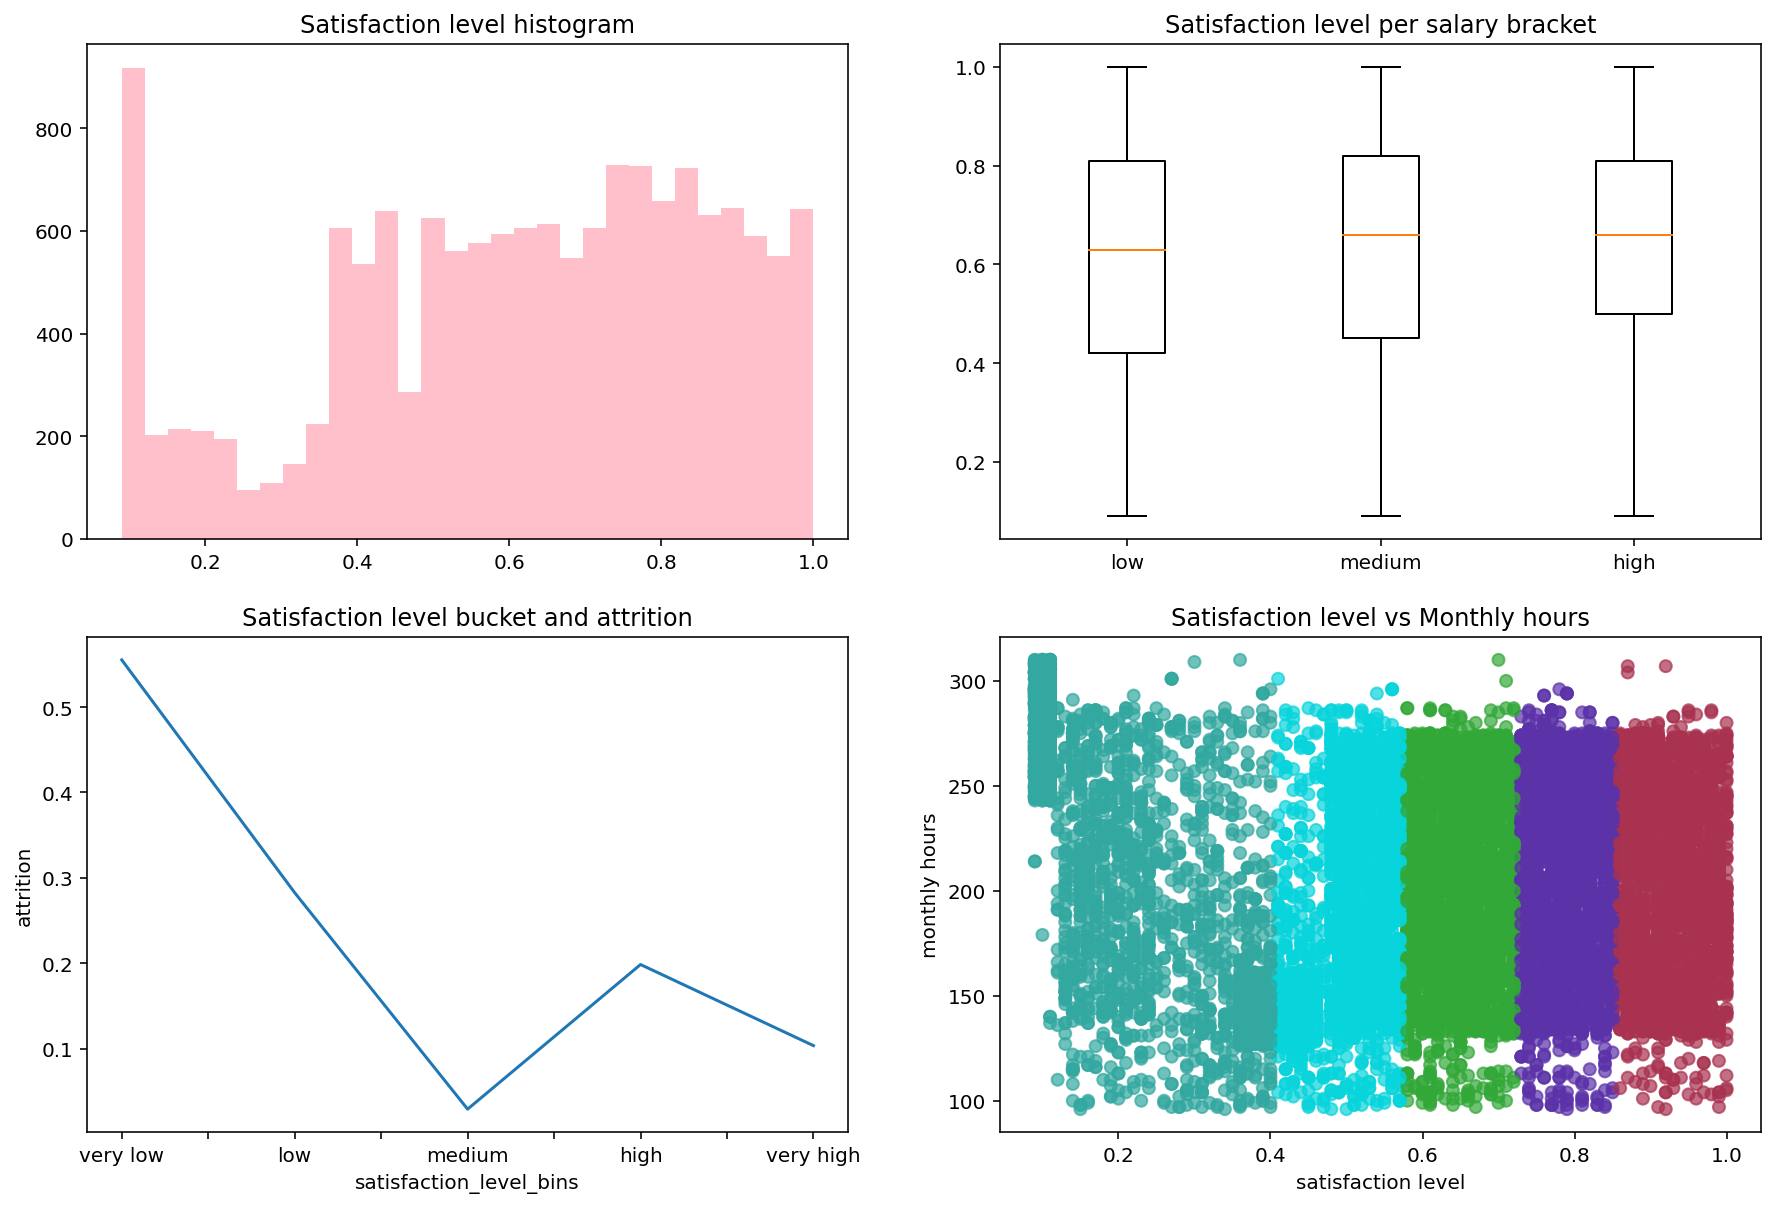

In [74]:
fig,ax=plt.subplots(figsize=(15,10), nrows = 2, ncols =2)
ax=ax.flatten()
fig.patch.set_alpha(1)
ax[0].hist(df['satisfaction_level'], bins = 30, color = 'pink')
ax[0].set_title('Satisfaction level histogram')

satisf_low_sal = df[df['salary']=='low']['satisfaction_level'].values
satisf_medium_sal = df[df['salary']=='medium']['satisfaction_level'].values
satisf_high_sal = df[df['salary']=='high']['satisfaction_level'].values

ax[1].boxplot([satisf_low_sal,satisf_medium_sal,satisf_high_sal])
ax[1].set_title('Satisfaction level per salary bracket')
ax[1].set_xticklabels(['low','medium','high'])

df.groupby('satisfaction_level_bins')['left'].mean().plot(ax=ax[2])
ax[2].set_title('Satisfaction level bucket and attrition')
ax[2].set_ylabel('attrition')


#Color schema
conditions = [
    df['satisfaction_level_bins']=='very low',
    df['satisfaction_level_bins']=='low',
    df['satisfaction_level_bins']=='medium',
    df['satisfaction_level_bins']=='high',
    df['satisfaction_level_bins']=='very high'
]

choices = [
    '#32a8a0',
    '#07d4db',
    '#32a838',
    '#5b32a8',
    '#a83250'
]

col_schema_arr = np.select(conditions,choices, default = '#a83250')


ax[3].scatter(df['satisfaction_level'],df['average_montly_hours'], alpha = 0.7, c = col_schema_arr)
ax[3].set_title('Satisfaction level vs Monthly hours')
ax[3].set_ylabel('monthly hours')
ax[3].set_xlabel('satisfaction level')

plt.show()


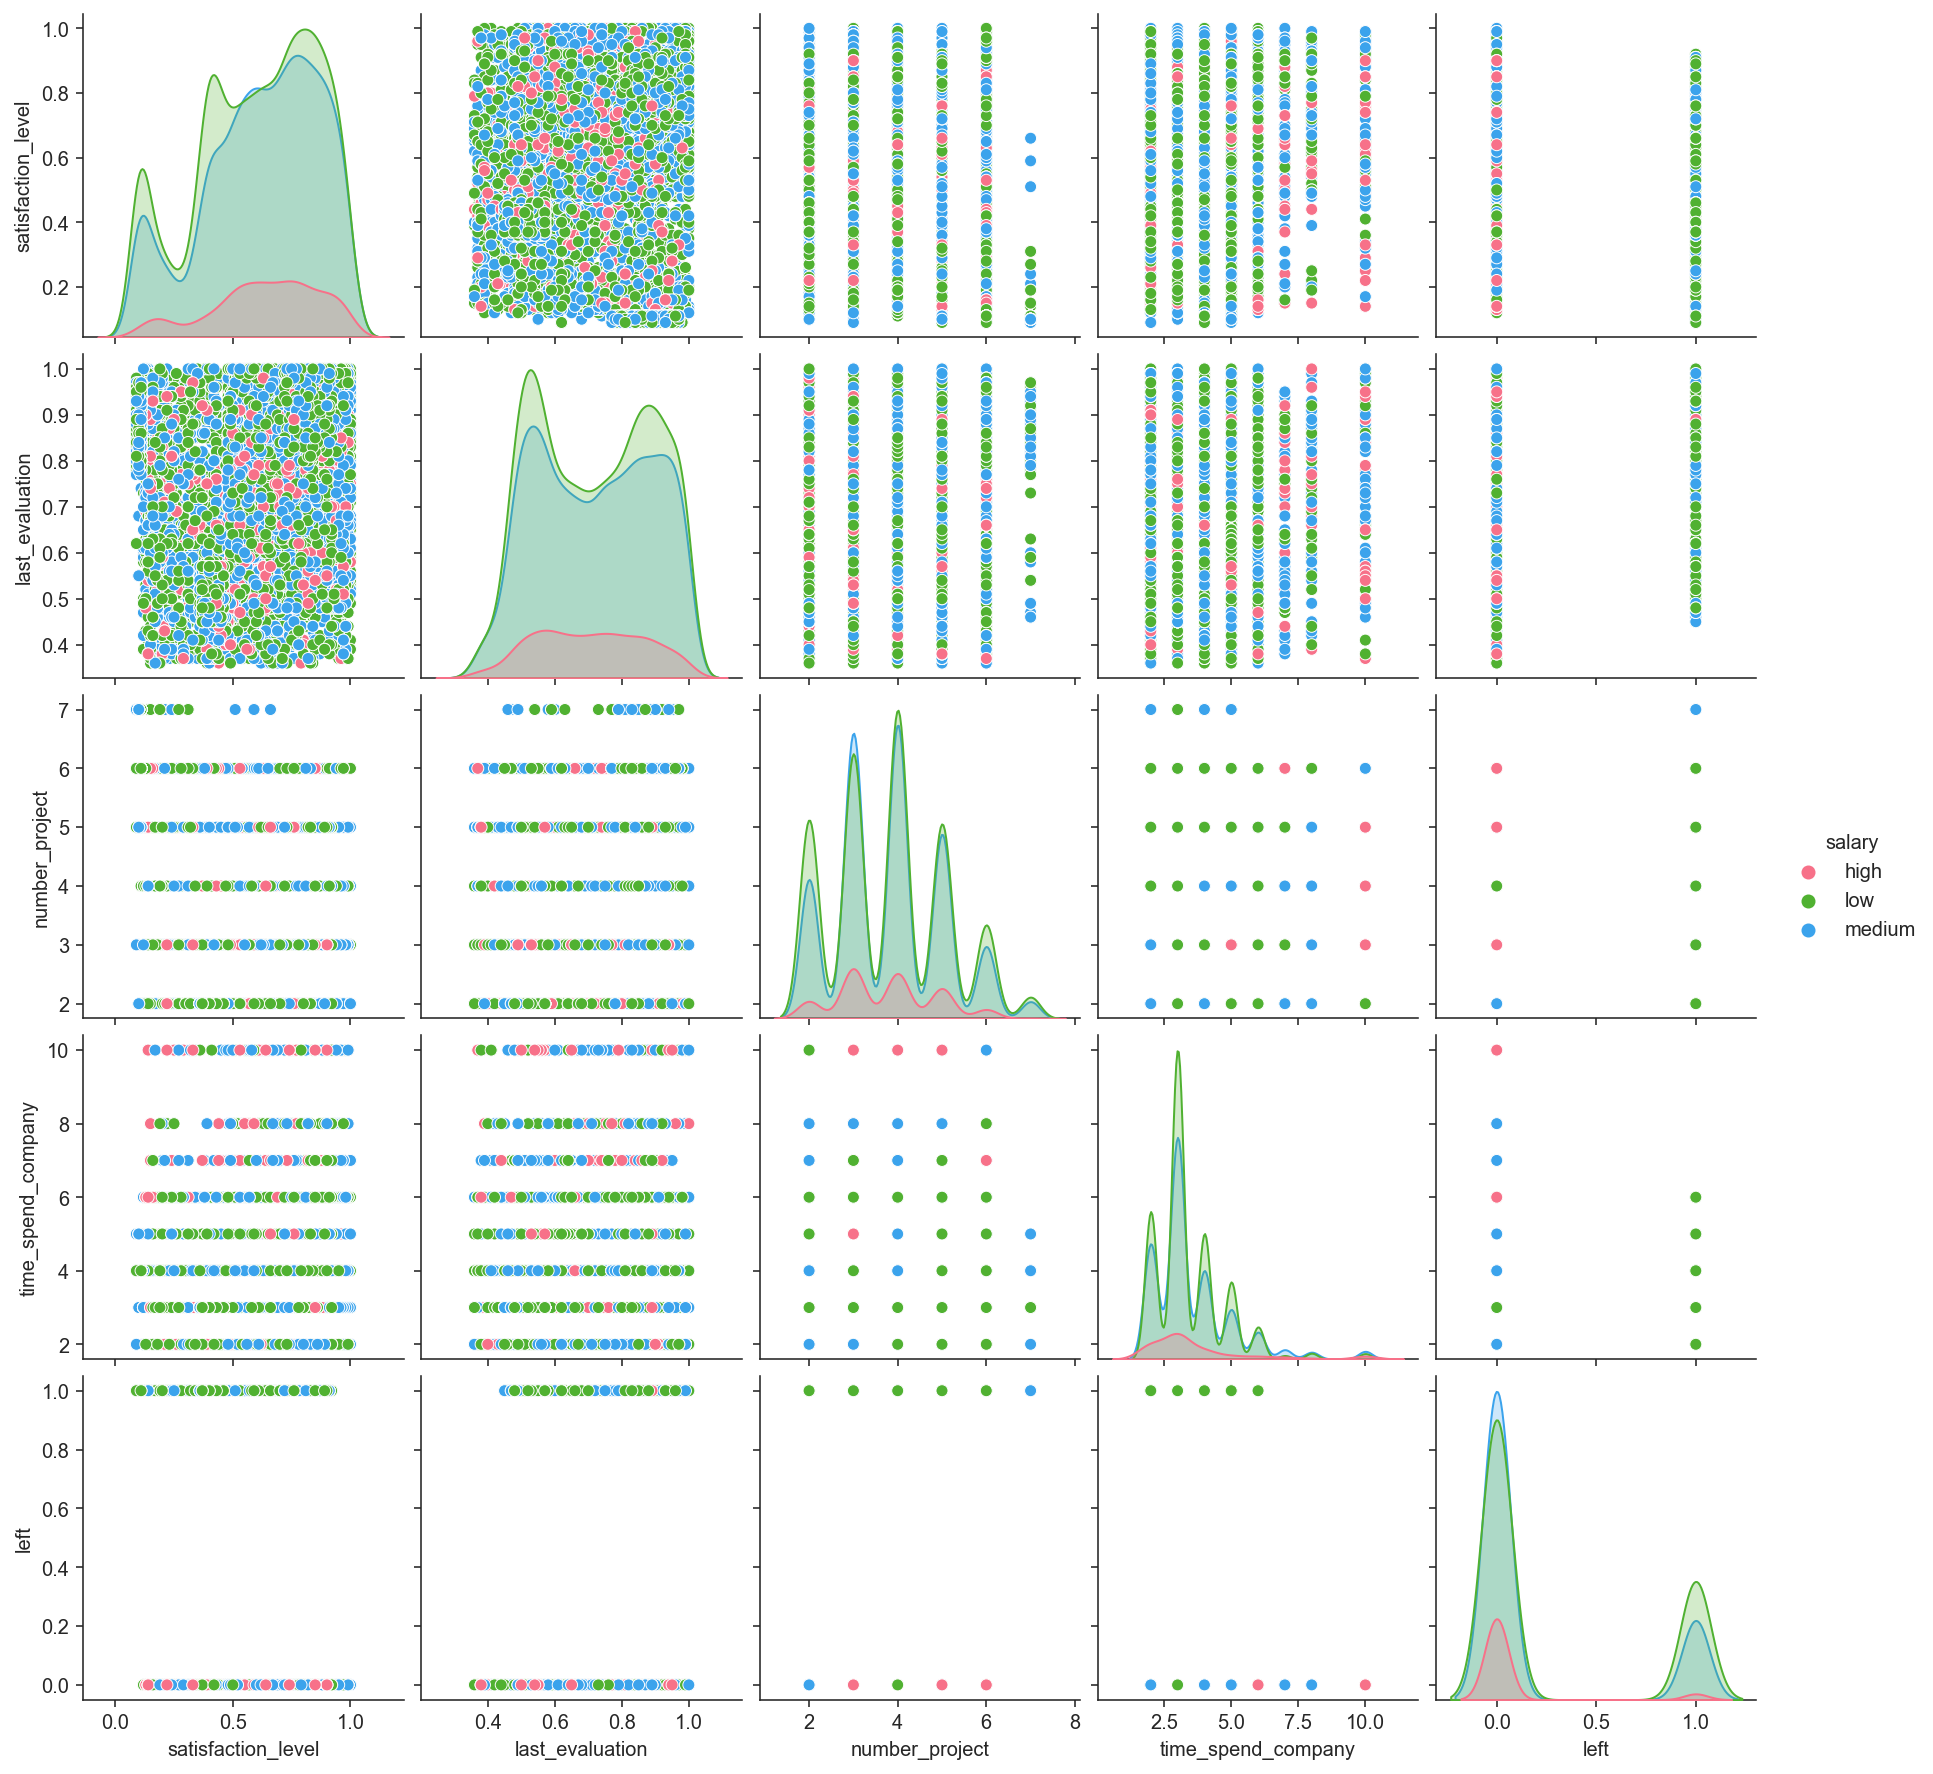

In [85]:
sns.set_style("ticks")
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project',
        'time_spend_company','Department', 'salary','left']],hue = 'salary',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

In [75]:
def attrition_summary_by_call(coln1,coln2, df= df):
    df_1 = df.groupby([coln1,coln2,'left']).agg(employee_count=pd.NamedAgg(column='Emp_Id', aggfunc='count')) \
            .reset_index().pivot(index=[coln1,coln2], columns='left', values='employee_count')
    df_1['Total'] = df_1.sum(axis=1)
    df_2 = round(df_1/df_1.sum(axis=0)*100,2)
    df_1['Attrition_percent'] = df_1.apply(lambda x:round(x[1]*100/(x[1]+x[0]),3),axis=1)
    return df_1

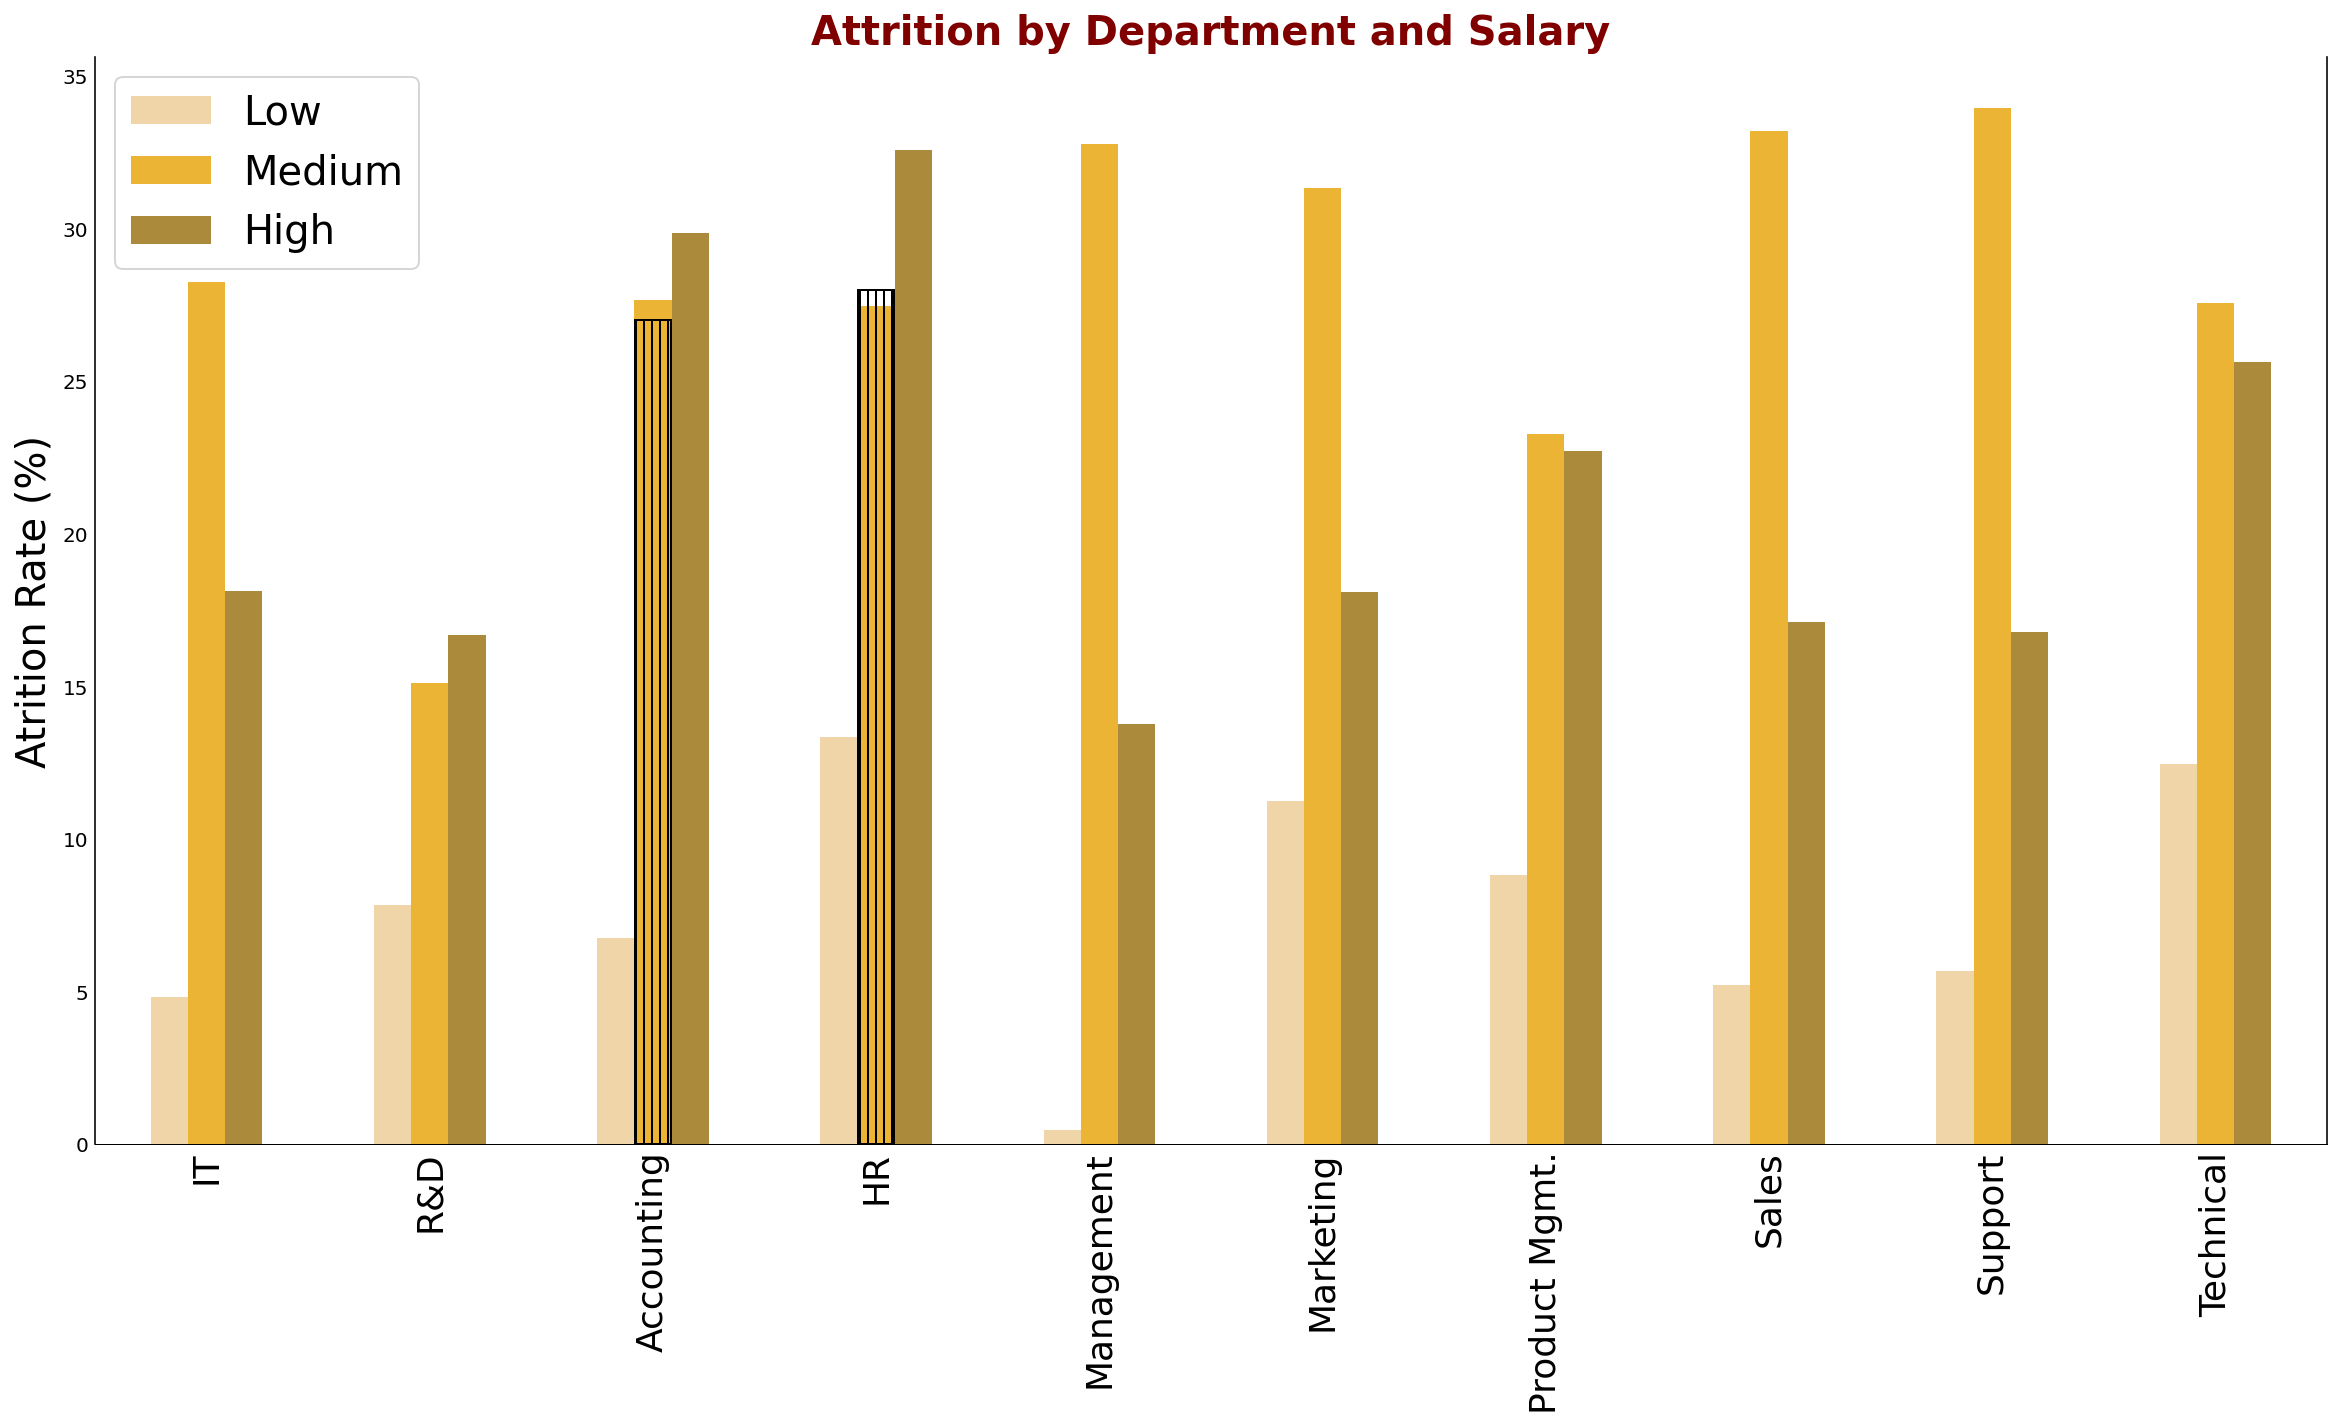

In [81]:
depts=['IT','R&D','Accounting','HR','Management','Marketing','Product Mgmt.','Sales','Support','Technical']

fig,ax=plt.subplots(figsize=(20,5))
attrition_summary_by_call('Department','salary')['Attrition_percent'].unstack().\
    plot.bar(figsize=(20,10), color=['#f0d5a8','#ebb434','#ab8a3c'], title='Attrition rate by dept and salary', ax= ax)

ax.set_title('Attrition by Department and Salary',fontsize=20,color='maroon' , weight = 'bold')
ax.set_xlabel('Department',fontsize=20)
ax.set_xticklabels(depts,rotation=90,fontsize=18)
ax.set_ylabel('Atrition Rate (%)',fontsize=20)
ax.legend(['Low','Medium','High'],fontsize=20)

ax.bar(3, 28, color = 'None',edgecolor='Black', width = 0.16, hatch='|||')
ax.bar(2, 27, color = 'None',edgecolor='Black', width = 0.16, hatch='|||')
ax.tick_params(axis='both', which='both', length=0)
ax.set(xlabel=None)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)


plt.show()

Dataset 2:

US states' unemployment, homicide data

In [59]:
df_states = pd.read_csv("states.csv")
df_states.head()

,State,Unemployment_rate,Population,Homicide_rate
0,Alabama,3.3,4934193,8.3
1,Alaska,6.6,724357,8.4
2,Arizona,6.8,7520103,5.9
3,Arkansas,4.4,3033946,8.6
4,California,7.7,39613493,4.6


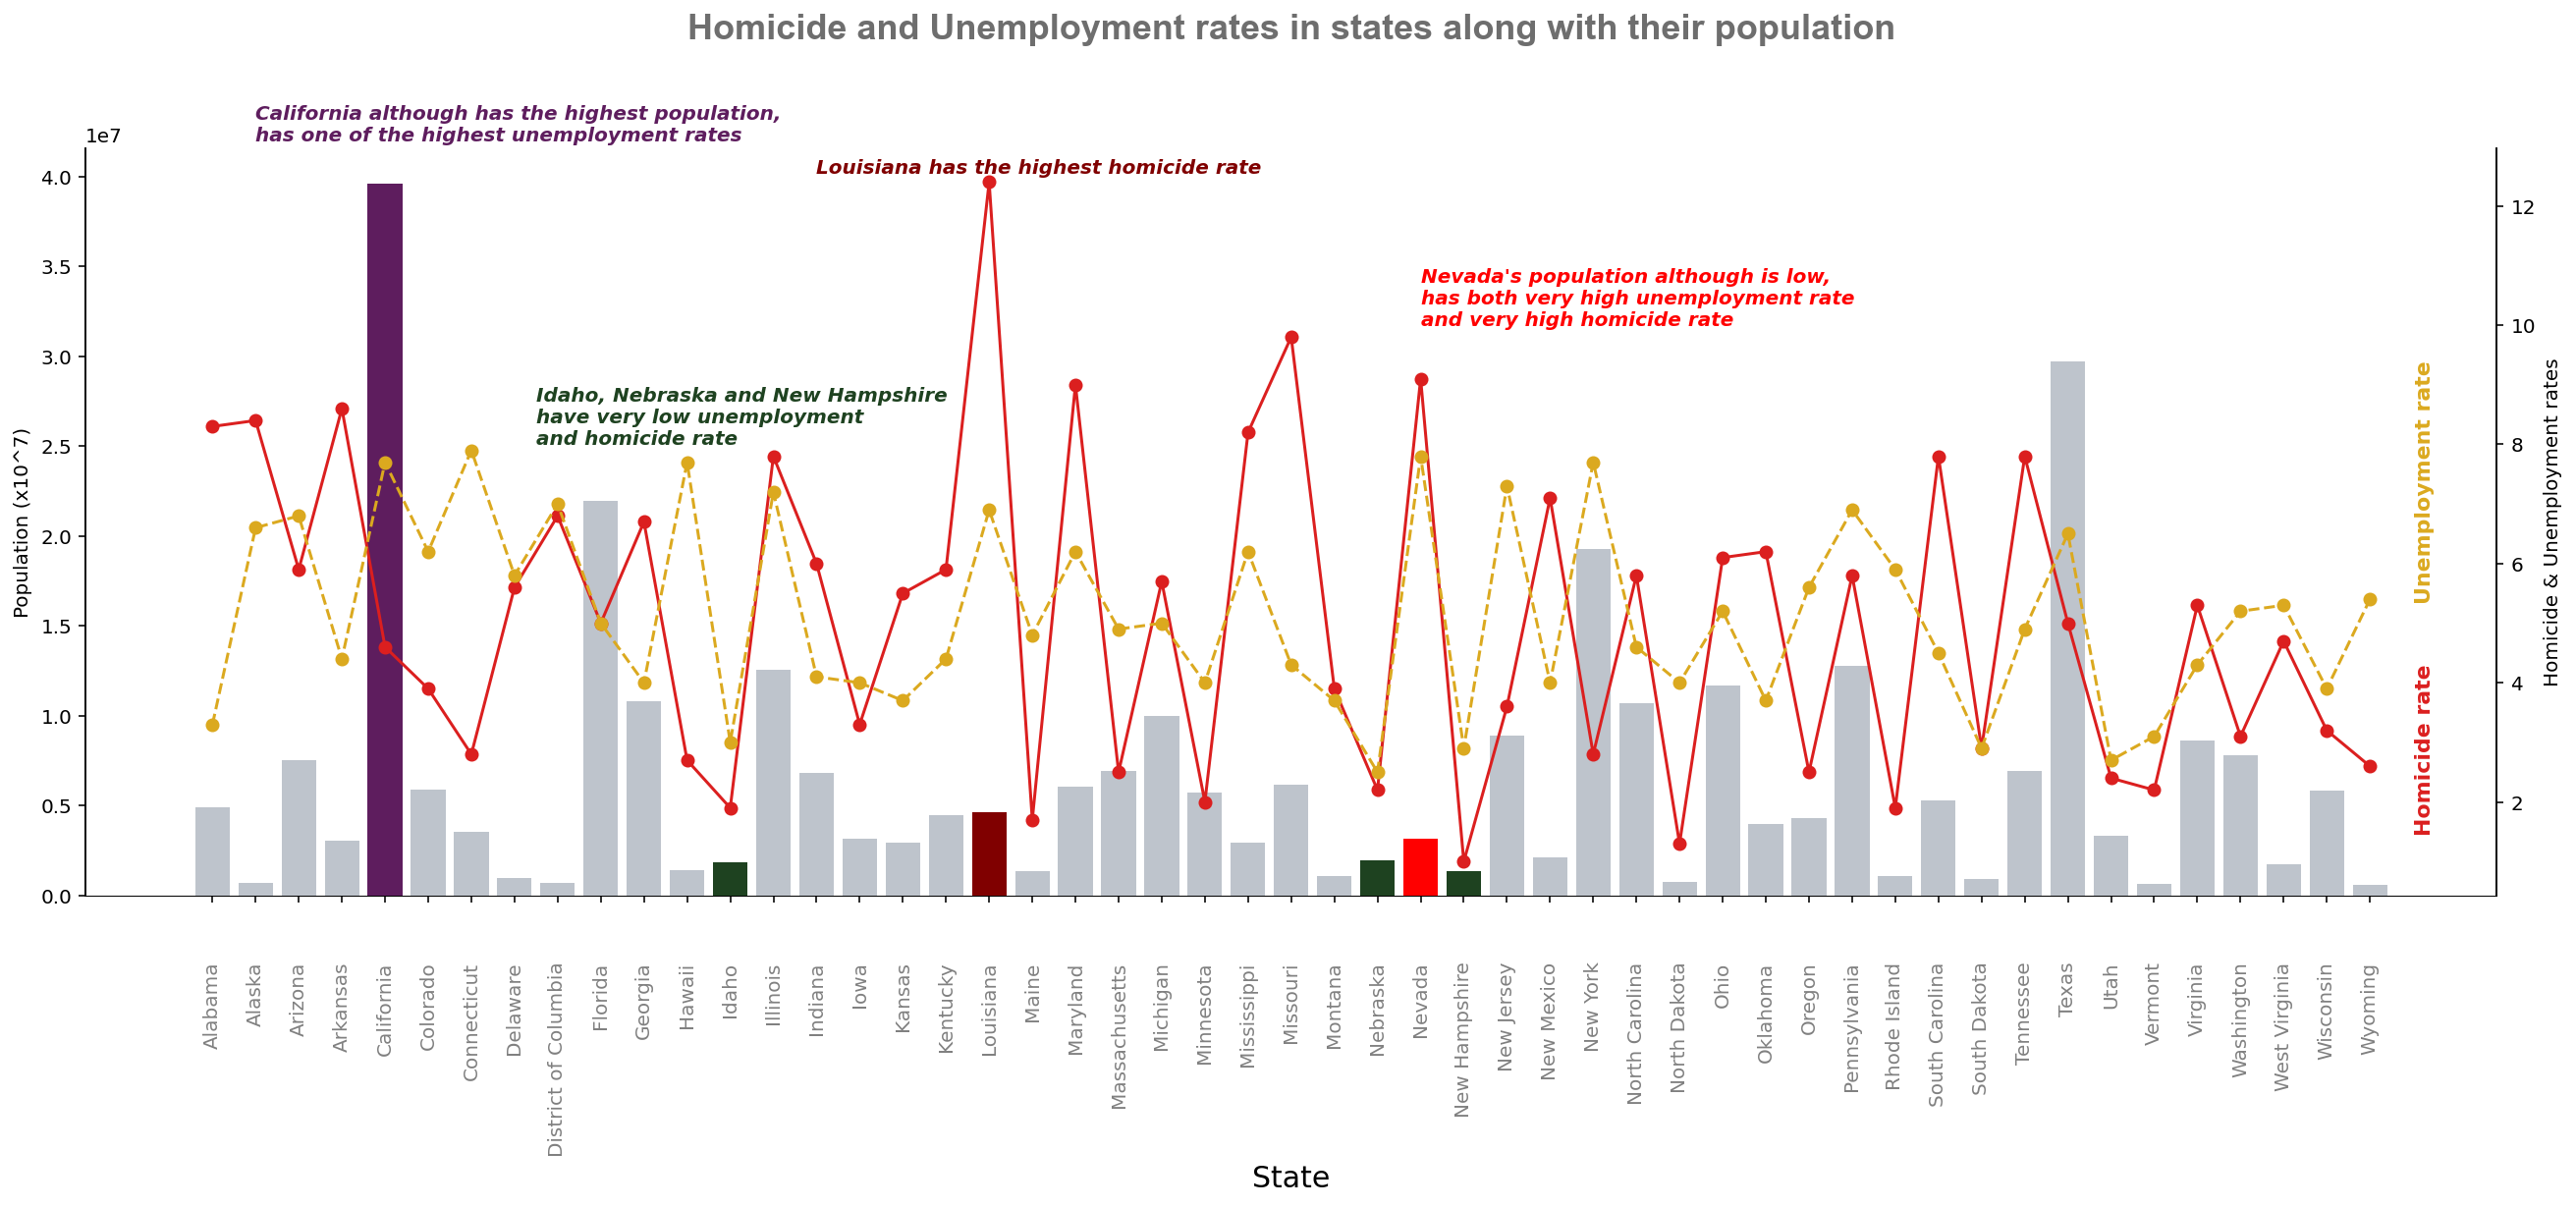

In [61]:
fig, ax = plt.subplots(figsize=(22,7))
fig.patch.set_alpha(1) # setting transparency of the figure

ax.bar(df_states['State'],df_states['Population'], \
       color = ['red' if i=='Nevada' else ('maroon' if i in ['Louisiana'] 
                                           else ('#5e1d5e' if i in ['California'] \
                                           else ('#1e4220' if i in ['Nebraska', 'New Hampshire', 'Idaho'] \
                                                 else '#bec4cc'))) for i in df_states['State'].values])

ax2 = ax.twinx()

ax2.plot(df_states['State'],df_states['Homicide_rate'], color = '#db1f1f', marker='o')
ax2.plot(df_states['State'],df_states['Unemployment_rate'], color = '#dba91f', marker='o',linestyle='--')

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax2.spines['bottom'].set_linewidth(.5)

ax.tick_params(axis='x', labelcolor='grey', color='black', labelrotation=90 ,pad =30)

ax2.text(len(df_states)+0.5, 5.4, "Unemployment rate",
        horizontalalignment='right', fontsize=11, c='#dba91f', weight='bold', rotation = 90)

ax2.text(len(df_states)+0.5, 1.5, "Homicide rate",
        horizontalalignment='right', fontsize=11, c='#db1f1f', weight='bold', rotation = 90)

ax.set_ylabel('Population (x10^7)',fontdict={'fontsize': 10})
ax2.set_ylabel('Homicide & Unemployment rates',fontdict={'fontsize': 10})
ax.set_xlabel('State',fontdict={'fontsize': 15})

ax2.text(s="Louisiana has the highest homicide rate",
        x=14, y=12.55, color = 'maroon' , style = 'italic', weight="bold")

ax2.text(s="Nevada's population although is low, \nhas both very high unemployment rate \nand very high homicide rate",
        x=28, y=10, color = 'red' , style = 'italic', weight="bold")

ax.text(s="California although has the highest population, \nhas one of the highest unemployment rates",
        x=1, y=(4.2*10**7), color = '#5e1d5e' , style = 'italic', weight="bold")

ax2.text(s="Idaho, Nebraska and New Hampshire \nhave very low unemployment \nand homicide rate",
        x=7.5, y=8, color = '#1e4220' , style = 'italic', weight="bold")

ax2.set_title("Homicide and Unemployment rates in states along with their population", size=18,\
             x = 0.5,y=1.13,\
             color='#6e6e6e',fontweight='bold', fontname="Arial")

plt.show()

Dataset 3:

small dataset example of companies and their main revenue metrics

In [62]:
df_top10_companies = pd.DataFrame([["Walmart",523964,14881],
["Sinopec Group",407009,6793.2],
["State Grid",383906,7970],
["China National Petroleum",379130,4443.2],
["Shell",352106,15842],
["Saudi Aramco",329784,88210.9],
["Volkswagen",282760,15542],
["BP",282616,4026],
["Amazon",280522,11588],
["Toyota Motor",275288,19096.2]], columns = ['Company','Revenue[$Mn]','Profit[$Mn]'])

In [63]:
df_top10_companies['Expenditure[$Mn]'] = df_top10_companies.apply(lambda row : row['Revenue[$Mn]']-row['Profit[$Mn]'], axis = 1)
df_top10_companies['Profit percentage'] = df_top10_companies.apply(lambda row : round(row['Profit[$Mn]']/row['Revenue[$Mn]'],2)*100, axis = 1)

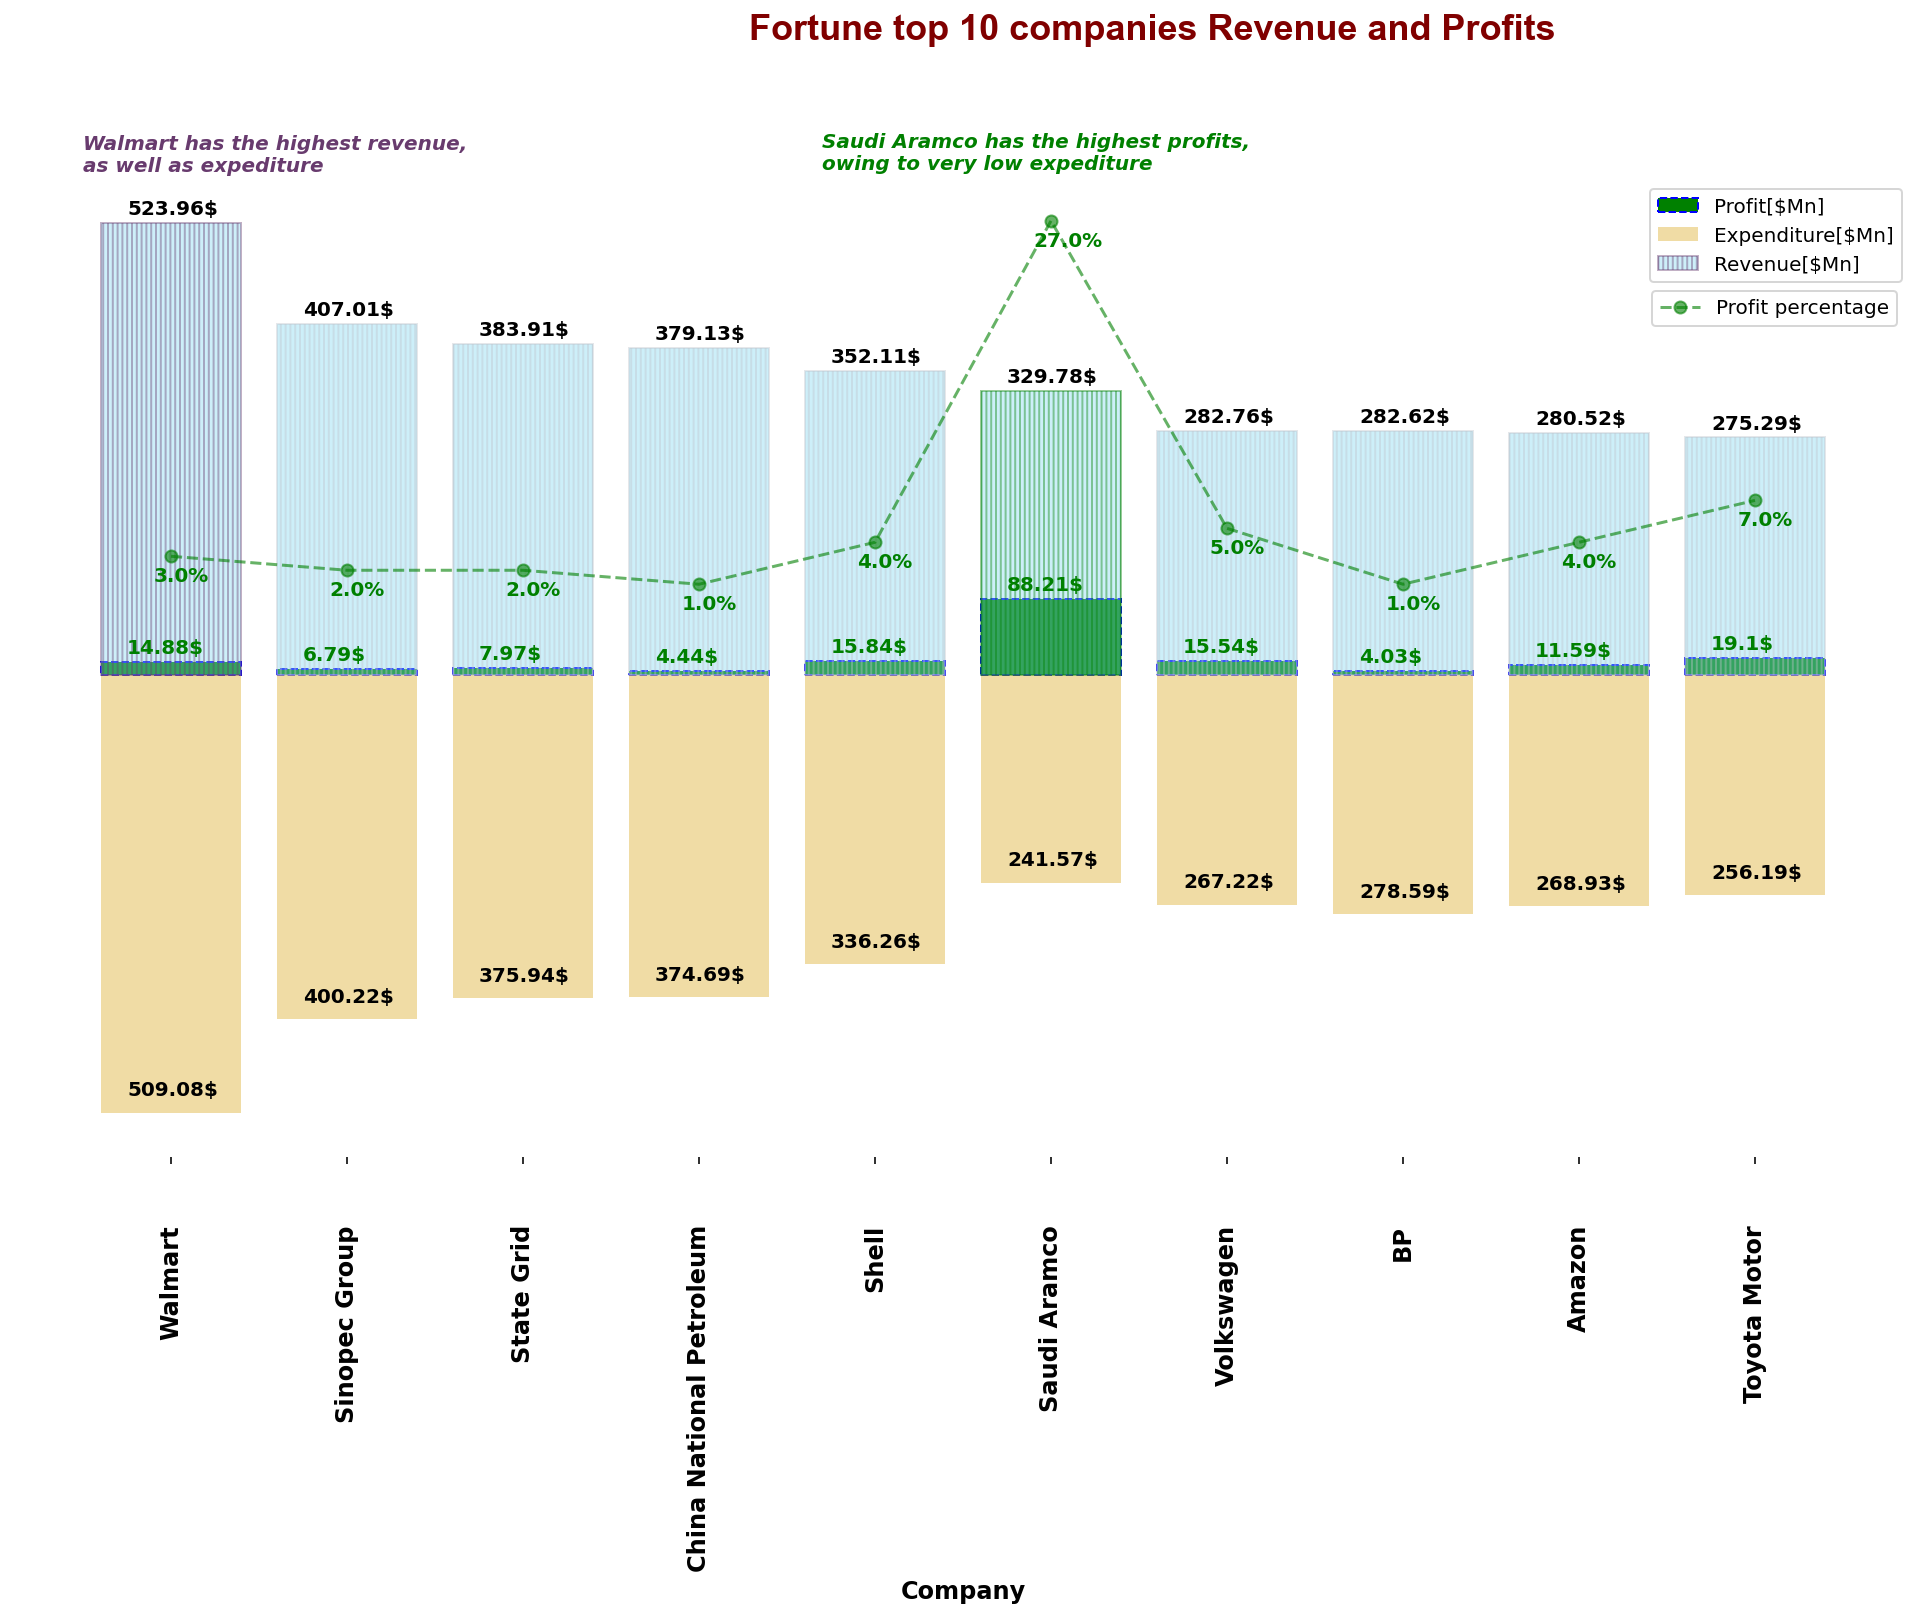

In [64]:
fig, ax = plt.subplots(figsize=(17,9))
fig.patch.set_alpha(1) # setting transparency of the figure

ax.bar(df_top10_companies['Company'], round(df_top10_companies['Profit[$Mn]']/1000,2),label = 'Profit[$Mn]', color ='g', alpha= 1, edgecolor='b',linestyle='--')
ax.bar(df_top10_companies['Company'], round(-1*(df_top10_companies['Expenditure[$Mn]']/1000),2) ,label = 'Expenditure[$Mn]', color='#dba91f', alpha= 0.4)
ax.bar(df_top10_companies['Company'], round(df_top10_companies['Revenue[$Mn]']/1000,2),label = 'Revenue[$Mn]', color='#83d8f2', alpha= 0.4,
             edgecolor = ['g' if i=='Saudi Aramco' else ('#683b6e' if i in ['Walmart'] 
                                                 else '#bec4cc') for i in df_top10_companies['Company'].values],hatch='|||||')


ax2 = ax.twinx()

ax2.plot(df_top10_companies['Company'],df_top10_companies['Profit percentage'], color = 'g', marker='o',label = 'Profit percentage',alpha= 0.6,linestyle='--')


#labelling
for i in range(1, len(df_top10_companies)+1):
    ax.text(x=(i-1.25),y=round(df_top10_companies['Revenue[$Mn]'][i-1]/1000,2)+10,s=f"{str(round(df_top10_companies['Revenue[$Mn]'][i-1]/1000,2))+'$'}", weight='bold')

for i in range(1, len(df_top10_companies)+1):
    ax.text(x=(i-1.25),y=round(df_top10_companies['Profit[$Mn]'][i-1]/1000,2)+10,s=f"{str(round(df_top10_companies['Profit[$Mn]'][i-1]/1000,2))+'$'}", weight='bold', color='g')

for i in range(1, len(df_top10_companies)+1):
    ax.text(x=(i-1.25),y=-round(df_top10_companies['Expenditure[$Mn]'][i-1]/1000,2)+20,s=f"{str(round(df_top10_companies['Expenditure[$Mn]'][i-1]/1000,2))+'$'}", weight='bold')

for i in range(1, len(df_top10_companies)+1):
    ax2.text(x=(i-1.10),y=round(df_top10_companies['Profit percentage'][i-1],2)-1.8,s=f"{str(round(df_top10_companies['Profit percentage'][i-1],2))+'%'}",color='g', weight='bold')
    

ax.set_xlabel('Company',fontdict={'fontsize': 12, 'weight':'bold'})

ax.tick_params(axis='x', labelcolor='black', color='black', labelrotation=90 ,pad =30)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)

ax2.tick_params(axis='x', labelcolor='black', color='black', labelrotation=90 ,pad =30)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_linewidth(.5)

ax.set_xticks(range(0,10))
ax.set_xticklabels(df_top10_companies['Company'].values, size=12 , weight ='bold' )

ax.axes.yaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)

ax.legend()
ax2.legend(loc=(0.863,0.85))
ax2.set_ylim(-40,30) # Setting twin axis limits so that graph is easily readable

ax2.set_title("Fortune top 10 companies Revenue and Profits", size=18,\
             x = 0.6,y=1.13,\
             color='maroon',fontweight='bold', fontname="Arial")
ax.text(s="Walmart has the highest revenue, \nas well as expediture",
        x=-0.5, y=(585), color = '#683b6e' , style = 'italic', weight="bold")

ax.text(s="Saudi Aramco has the highest profits, \nowing to very low expediture",
        x=3.7, y=(587), color = 'g' , style = 'italic', weight="bold")

plt.show()